In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2021-05.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.929400,6.907944,50.928809,6.931119,2021-05-07 19:06:01,2021-05-07 19:17:02,11.0,1626.0,44493823,44606923,3476.0,NaN,BIKE 221167,1355
1,50.928809,6.931119,50.918764,6.941073,2021-05-07 19:50:01,2021-05-07 20:16:02,26.0,1317.0,44606923,44609866,33.0,NaN,BIKE 221167,1346
2,50.918764,6.941073,50.919813,6.920601,2021-05-07 20:22:02,2021-05-07 20:31:01,9.0,1440.0,44609866,44610543,6.0,NaN,BIKE 221167,1347
3,50.919813,6.920601,50.917889,6.939040,2021-05-07 20:39:01,2021-05-07 20:49:02,10.0,1311.0,44610543,44611317,8.0,NaN,BIKE 221167,1343
4,50.917889,6.939040,50.917853,6.939453,2021-05-07 22:01:02,2021-05-07 22:02:01,1.0,29.0,44611317,44614430,72.0,NaN,BIKE 221167,1323


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

117440

In [14]:
len(out_distances_total)

42280

In [15]:
len(out_rides)

39758

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

46847

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

35191

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

10.0       172
9.0        169
7.0        164
8.0        161
12.0       152
15.0       150
11.0       146
6.0        144
13.0       137
14.0       134
4.0        127
5.0        126
17.0       125
16.0       117
3.0        115
19.0       111
18.0       109
20.0        94
24.0        90
21.0        83
22.0        81
2.0         80
23.0        80
25.0        73
26.0        70
32.0        64
28.0        63
29.0        58
34.0        55
27.0        52
          ... 
7994.0       1
8467.0       1
6643.0       1
7055.0       1
4874.0       1
4848.0       1
5602.0       1
6494.0       1
6093.0       1
5692.0       1
7923.0       1
6459.0       1
7245.0       1
11814.0      1
6590.0       1
6701.0       1
6547.0       1
5892.0       1
4984.0       1
6328.0       1
6981.0       1
6177.0       1
5965.0       1
5123.0       1
8896.0       1
7824.0       1
5139.0       1
6534.0       1
5464.0       1
7629.0       1
Name: distance, Length: 6279, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

7089

In [23]:
len(out_distances + out_rides)

46847

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

39.89015667574932


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70593 entries, 0 to 70592
Data columns (total 15 columns):
index                   70593 non-null int64
lat_begin               70593 non-null float64
lng_begin               70593 non-null float64
lat_end                 70593 non-null float64
lng_end                 70593 non-null float64
ride_begin              70593 non-null object
ride_end                70593 non-null object
ride_time               70593 non-null float64
distance                70593 non-null float64
uid_begin               70593 non-null int64
uid_end                 70593 non-null int64
standing_before_ride    70593 non-null float64
address                 84 non-null object
name                    70593 non-null object
available_bikes         70593 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 8.1+ MB


In [27]:
df_c['distance'].value_counts()

498.0     50
776.0     50
413.0     49
478.0     49
622.0     48
503.0     48
484.0     47
565.0     47
487.0     47
663.0     46
445.0     46
501.0     46
550.0     46
728.0     46
327.0     45
518.0     45
552.0     45
559.0     45
508.0     45
394.0     45
669.0     44
674.0     44
504.0     44
579.0     44
485.0     44
540.0     44
794.0     44
714.0     44
429.0     44
576.0     44
          ..
6661.0     1
7204.0     1
7731.0     1
7250.0     1
5401.0     1
6693.0     1
4785.0     1
5297.0     1
5071.0     1
4872.0     1
4459.0     1
6535.0     1
6086.0     1
9497.0     1
6156.0     1
5694.0     1
4469.0     1
5157.0     1
5034.0     1
6688.0     1
5746.0     1
4749.0     1
8477.0     1
6200.0     1
9794.0     1
4903.0     1
4494.0     1
4419.0     1
6609.0     1
5703.0     1
Name: distance, Length: 6066, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

5.0      4697
6.0      4593
7.0      4161
4.0      4052
8.0      3888
9.0      3633
10.0     3405
11.0     3284
12.0     3045
13.0     2773
14.0     2581
15.0     2423
16.0     2302
17.0     2063
3.0      2019
18.0     1835
19.0     1678
20.0     1463
21.0     1363
22.0     1253
23.0     1094
24.0     1000
25.0      920
26.0      869
27.0      786
28.0      652
29.0      606
30.0      572
31.0      453
33.0      330
         ... 
424.0       1
371.0       1
618.0       1
604.0       1
622.0       1
619.0       1
467.0       1
452.0       1
373.0       1
495.0       1
590.0       1
617.0       1
598.0       1
395.0       1
477.0       1
672.0       1
468.0       1
222.0       1
659.0       1
560.0       1
486.0       1
562.0       1
679.0       1
258.0       1
551.0       1
540.0       1
307.0       1
585.0       1
587.0       1
565.0       1
Name: ride_time, Length: 622, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[13,
 31,
 32,
 75,
 83,
 124,
 125,
 160,
 209,
 233,
 235,
 246,
 269,
 285,
 303,
 322,
 332,
 333,
 384,
 410,
 415,
 443,
 444,
 509,
 531,
 559,
 606,
 624,
 641,
 642,
 669,
 672,
 721,
 779,
 835,
 836,
 838,
 840,
 851,
 859,
 869,
 909,
 910,
 923,
 1047,
 1080,
 1081,
 1127,
 1166,
 1167,
 1178,
 1191,
 1212,
 1221,
 1223,
 1255,
 1270,
 1271,
 1295,
 1305,
 1310,
 1347,
 1349,
 1350,
 1361,
 1365,
 1366,
 1415,
 1456,
 1481,
 1546,
 1547,
 1654,
 1655,
 1723,
 1804,
 1807,
 1856,
 1905,
 1922,
 1968,
 1971,
 1989,
 2002,
 2029,
 2068,
 2069,
 2152,
 2166,
 2167,
 2226,
 2232,
 2271,
 2340,
 2367,
 2401,
 2405,
 2406,
 2418,
 2442,
 2444,
 2457,
 2529,
 2606,
 2641,
 2652,
 2686,
 2710,
 2785,
 2790,
 2794,
 2807,
 2848,
 2856,
 2880,
 2928,
 2932,
 2936,
 2952,
 2958,
 3035,
 3057,
 3070,
 3084,
 3103,
 3104,
 3171,
 3234,
 3308,
 3344,
 3348,
 3362,
 3382,
 3451,
 3536,
 3553,
 3627,
 3663,
 3691,
 3692,
 3702,
 3703,
 3718,
 3728,
 3797,
 3798,
 3799,
 3800,
 3807,
 3882,

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
13,36,50.925169,6.955506,50.924067,6.952367,2021-05-01 07:30:01,2021-05-01 07:33:01,3.0,252.0,44325281,44326777,160.0,NaN,BIKE 220117,1536
31,77,50.916333,6.963714,50.917596,6.961322,2021-05-12 12:20:02,2021-05-12 12:24:01,4.0,219.0,44861598,44868034,151.0,NaN,BIKE 220117,1311
32,78,50.917596,6.961322,50.917227,6.964192,2021-05-12 12:27:01,2021-05-12 12:29:01,2.0,205.0,44868034,44868293,3.0,NaN,BIKE 220117,1295
75,157,50.946924,6.923062,50.947142,6.927191,2021-05-17 08:35:01,2021-05-17 08:38:02,3.0,290.0,45108771,45108999,3.0,NaN,BIKE 220211,1273
83,174,50.969742,6.951952,50.967880,6.953018,2021-05-26 14:22:02,2021-05-26 14:25:02,3.0,220.0,45539579,45620930,2438.0,NaN,BIKE 220211,1353
124,241,50.926951,6.939531,50.928467,6.942721,2021-05-20 15:16:02,2021-05-20 15:19:03,3.0,280.0,45281093,45282349,18.0,NaN,BIKE 221052,1345
125,242,50.928467,6.942721,50.927116,6.939484,2021-05-20 15:25:02,2021-05-20 15:28:01,3.0,272.0,45282349,45282869,6.0,NaN,BIKE 221052,1336
160,301,50.946467,6.931875,50.949098,6.931688,2021-05-16 11:45:01,2021-05-16 13:07:01,82.0,293.0,45062495,45066401,20.0,NaN,BIKE 221228,1298
209,374,50.948529,6.992523,50.949640,6.988908,2021-05-06 20:38:01,2021-05-06 20:47:01,9.0,282.0,44564320,44566565,47.0,NaN,BIKE 220068,1368
233,418,50.931484,6.948486,50.930453,6.946073,2021-05-03 12:02:01,2021-05-03 12:05:02,3.0,204.0,44400587,44409958,275.0,NaN,BIKE 220619,1415


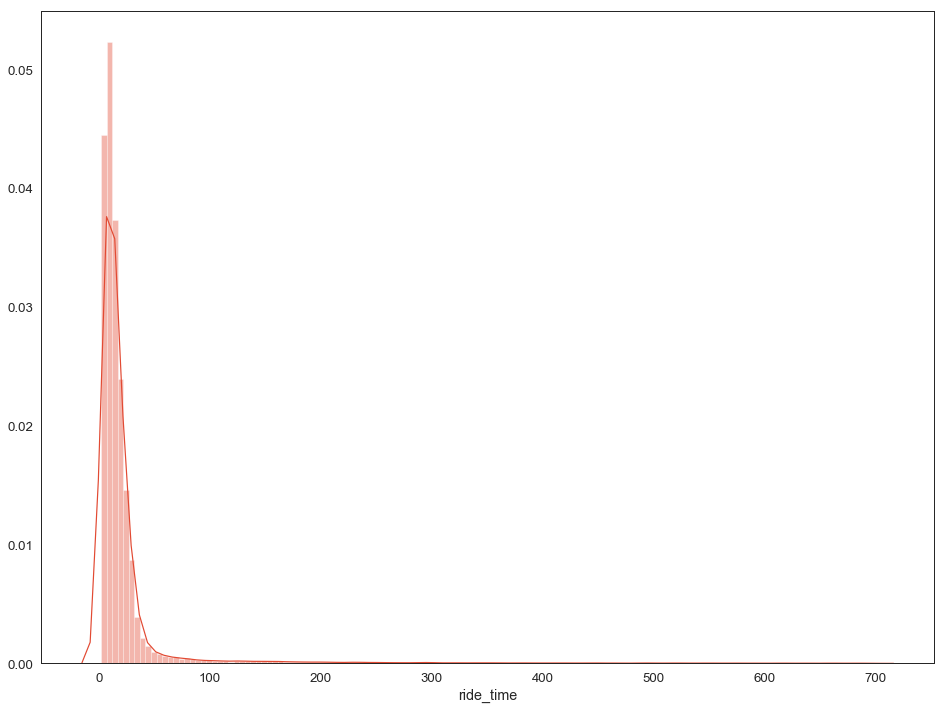

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

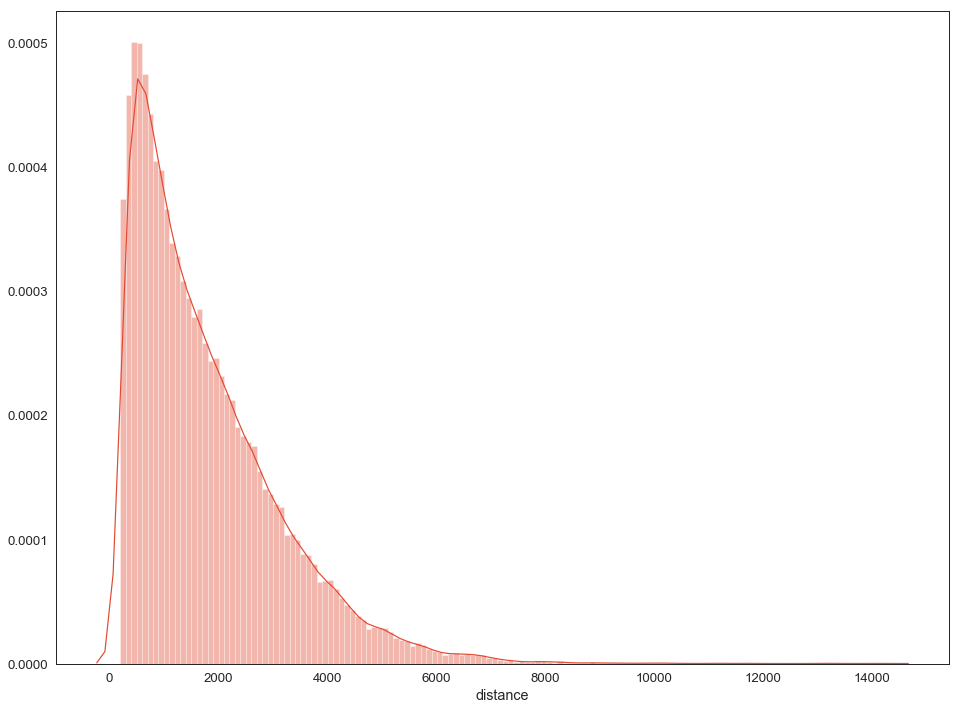

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
1154,2044,50.940209,6.924333,50.950147,6.917521,2021-05-12 10:53:01,2021-05-12 11:06:02,13.0,1204.0,44799247,44864509,1548.0,Innere Kanalstraße 15,BIKE 220669,1367
2882,4909,50.954827,6.988902,50.962071,7.013213,2021-05-29 15:32:01,2021-05-29 20:46:02,314.0,1884.0,45773450,45831006,1021.0,Auenweg 193 51063 Köln,BIKE 220795,1383
3076,5221,50.914729,6.941317,50.941809,6.957044,2021-05-30 07:06:01,2021-05-30 07:27:02,21.0,3208.0,45833195,45848465,584.0,Venloer Straße 200,BIKE 220446,1349
5153,8631,50.920080,6.930096,50.943587,6.985588,2021-05-18 04:47:01,2021-05-18 05:08:01,21.0,4687.0,45142631,45152619,506.0,Arnulfstraße,BIKE 221104,1288
5566,9312,50.952142,6.919094,50.948493,6.919787,2021-05-20 16:26:01,2021-05-20 16:32:01,6.0,409.0,45275026,45287323,206.0,Köln - Bahnhof Ehrenfeld,BIKE 220079,1337
5741,9620,50.926707,6.938474,50.915747,6.931718,2021-05-09 16:22:01,2021-05-09 16:30:01,8.0,1308.0,44697417,44698621,6.0,Bahnhof Köln Süd,BIKE 220269,1213
6570,10978,50.941111,6.974017,50.941726,6.957699,2021-05-02 15:16:02,2021-05-02 16:09:01,53.0,1146.0,44378404,44382341,59.0,Ottoplatz,BIKE 21602,1386
6695,11197,50.961973,7.008082,50.942076,6.957702,2021-05-19 11:49:01,2021-05-19 12:15:01,26.0,4167.0,45213262,45218799,123.0,Eulenbergstraße 26,BIKE 221345,1332
7061,11788,50.910285,6.946747,50.913184,6.938389,2021-05-02 19:26:02,2021-05-02 19:34:01,8.0,669.0,44388670,44389438,15.0,"Nauheimer Str. 28, 50969 Köln",BIKE 21138,1366
7996,13358,50.950058,6.918380,50.954569,6.921314,2021-05-22 09:56:01,2021-05-22 10:00:02,4.0,542.0,45387962,45389195,43.0,Hansemannstraße 10,BIKE 221208,1393


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
912,1546,50.898356,6.951217,50.919973,6.904997,2021-05-21 09:50:02,2021-05-21 10:10:01,20.0,4036.0,45314519,45328691,609.0,NaN,BIKE 220376,1371
913,1547,50.919973,6.904997,50.898382,6.951250,2021-05-21 12:11:02,2021-05-21 12:32:03,21.0,4036.0,45328691,45334957,121.0,NaN,BIKE 220376,1343
1036,1756,50.964822,6.954081,50.965404,6.947822,2021-05-29 16:34:02,2021-05-29 16:38:02,4.0,443.0,45800205,45811281,157.0,NaN,BIKE 220010,1309
1037,1757,50.965404,6.947822,50.964004,6.953749,2021-05-29 17:54:01,2021-05-29 17:58:01,4.0,443.0,45811281,45817745,76.0,NaN,BIKE 220010,1282
1327,2349,50.946004,6.974938,50.937702,6.997930,2021-05-13 11:40:01,2021-05-13 11:52:01,12.0,1857.0,44915141,44916807,40.0,NaN,BIKE 221140,1293
1328,2350,50.937702,6.997930,50.945964,6.974912,2021-05-13 13:39:02,2021-05-13 14:03:02,24.0,1857.0,44916807,44922378,107.0,NaN,BIKE 221140,1273
2559,4432,50.922004,6.906715,50.938907,6.939620,2021-05-28 20:06:01,2021-05-28 20:20:01,14.0,2976.0,45758881,45766152,80.0,NaN,BIKE 221072,1323
2560,4433,50.938907,6.939620,50.921982,6.906743,2021-05-28 20:25:01,2021-05-28 20:42:02,17.0,2976.0,45766152,45767680,5.0,NaN,BIKE 221072,1344
2909,4962,50.959547,6.998029,50.943271,6.995536,2021-05-15 10:23:01,2021-05-15 10:33:01,10.0,1819.0,44973757,45010050,1137.0,NaN,BIKE 220467,1245
2910,4963,50.943271,6.995536,50.959551,6.998066,2021-05-15 10:48:02,2021-05-15 10:57:01,9.0,1819.0,45010050,45010975,15.0,NaN,BIKE 220467,1311


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
4503,7551,50.936791,6.873118,50.945040,6.670515,2021-05-31 10:06:02,2021-05-31 10:08:02,2.0,14230.0,45913269,45917025,82.0,NaN,BIKE 220417,1368,1500.0
5889,9841,50.936302,7.148185,50.925013,6.958506,2021-05-31 22:49:01,2021-05-31 22:59:01,10.0,13356.0,45957588,45973592,181.0,NaN,BIKE 220199,1162,6500.0
5984,9997,50.916138,6.926988,50.959147,6.882435,2021-05-03 13:50:01,2021-05-03 13:57:02,7.0,5713.0,44413306,44414683,23.0,NaN,BIKE 220294,1198,4000.0
7003,11705,50.918822,6.902597,50.998569,6.937336,2021-05-23 14:12:01,2021-05-23 14:24:01,12.0,9198.0,45438580,45452160,403.0,NaN,BIKE 220940,1401,6500.0
25582,42447,50.920000,6.934528,50.942640,6.918131,2021-05-22 22:23:02,2021-05-22 22:25:02,2.0,2768.0,45426645,45427092,12.0,NaN,BIKE 221282,1382,1500.0
32026,53094,50.958502,6.949562,50.945084,6.931814,2021-05-10 13:57:02,2021-05-10 13:59:02,2.0,1943.0,44523440,44750219,6757.0,NaN,BIKE 220275,1340,1500.0
42623,70693,50.955396,6.964268,50.927898,6.931952,2021-05-13 20:27:02,2021-05-13 20:29:02,2.0,3806.0,44926933,44943095,300.0,NaN,BIKE 221088,1231,1500.0
54786,91017,50.902987,6.964713,50.917147,6.960652,2021-05-13 13:10:01,2021-05-13 13:12:01,2.0,1601.0,44913329,44920001,193.0,NaN,BIKE 220515,1317,1500.0
64944,107910,50.936209,6.970742,50.931662,6.932552,2021-05-31 18:46:07,2021-05-31 18:47:39,2.0,2724.0,45948150,45954499,67.0,NaN,BIKE 220566,1312,1500.0


In [46]:
len(unmatched_distances)

9

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                              70500
Stammheimerstraße 103                                2
robert koch straße 10                                1
Severinstraße                                        1
Äußere Kanalstraße & Feltenstraße 50827 Köln         1
recording_117317429                                  1
Kerpenerstraße 21                                    1
Jungblutgasse 7                                      1
Innere Kanalstraße 15                                1
tempelstraße 50                                      1
Lindenbornstraße Ecke Sömmerring Straße -Köln        1
Domstraße 53                                         1
Köln  - Eberplatz                                    1
recording_117393296                                  1
Köln - Merowingerstraße                              1
Melatengürtel 23                                     1
Köln - Blögenerstraße                                1
Am Oberländer Ufer Bushaltestelle                    1
Köln - Bah

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-05.csv', sep=';', index=False) 

In [52]:
len(df_c)

70584